# Boston House Price Prediction Model

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split,GridSearchCV,RandomizedSearchCV
from sklearn.metrics import mean_squared_error,mean_absolute_error,r2_score
from sklearn.linear_model import LinearRegression
from sklearn.datasets import load_boston

# Problem Statement

# Data Gathering

In [2]:
data = load_boston()
data

{'data': array([[6.3200e-03, 1.8000e+01, 2.3100e+00, ..., 1.5300e+01, 3.9690e+02,
         4.9800e+00],
        [2.7310e-02, 0.0000e+00, 7.0700e+00, ..., 1.7800e+01, 3.9690e+02,
         9.1400e+00],
        [2.7290e-02, 0.0000e+00, 7.0700e+00, ..., 1.7800e+01, 3.9283e+02,
         4.0300e+00],
        ...,
        [6.0760e-02, 0.0000e+00, 1.1930e+01, ..., 2.1000e+01, 3.9690e+02,
         5.6400e+00],
        [1.0959e-01, 0.0000e+00, 1.1930e+01, ..., 2.1000e+01, 3.9345e+02,
         6.4800e+00],
        [4.7410e-02, 0.0000e+00, 1.1930e+01, ..., 2.1000e+01, 3.9690e+02,
         7.8800e+00]]),
 'target': array([24. , 21.6, 34.7, 33.4, 36.2, 28.7, 22.9, 27.1, 16.5, 18.9, 15. ,
        18.9, 21.7, 20.4, 18.2, 19.9, 23.1, 17.5, 20.2, 18.2, 13.6, 19.6,
        15.2, 14.5, 15.6, 13.9, 16.6, 14.8, 18.4, 21. , 12.7, 14.5, 13.2,
        13.1, 13.5, 18.9, 20. , 21. , 24.7, 30.8, 34.9, 26.6, 25.3, 24.7,
        21.2, 19.3, 20. , 16.6, 14.4, 19.4, 19.7, 20.5, 25. , 23.4, 18.9,
        35.4, 24.7, 3

In [3]:
df = pd.DataFrame(data.data,columns=data.feature_names)
df

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33
...,...,...,...,...,...,...,...,...,...,...,...,...,...
501,0.06263,0.0,11.93,0.0,0.573,6.593,69.1,2.4786,1.0,273.0,21.0,391.99,9.67
502,0.04527,0.0,11.93,0.0,0.573,6.120,76.7,2.2875,1.0,273.0,21.0,396.90,9.08
503,0.06076,0.0,11.93,0.0,0.573,6.976,91.0,2.1675,1.0,273.0,21.0,396.90,5.64
504,0.10959,0.0,11.93,0.0,0.573,6.794,89.3,2.3889,1.0,273.0,21.0,393.45,6.48


In [4]:
df['TARGET'] = data.target

In [5]:
df

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,TARGET
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33,36.2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
501,0.06263,0.0,11.93,0.0,0.573,6.593,69.1,2.4786,1.0,273.0,21.0,391.99,9.67,22.4
502,0.04527,0.0,11.93,0.0,0.573,6.120,76.7,2.2875,1.0,273.0,21.0,396.90,9.08,20.6
503,0.06076,0.0,11.93,0.0,0.573,6.976,91.0,2.1675,1.0,273.0,21.0,396.90,5.64,23.9
504,0.10959,0.0,11.93,0.0,0.573,6.794,89.3,2.3889,1.0,273.0,21.0,393.45,6.48,22.0


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 506 entries, 0 to 505
Data columns (total 14 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   CRIM     506 non-null    float64
 1   ZN       506 non-null    float64
 2   INDUS    506 non-null    float64
 3   CHAS     506 non-null    float64
 4   NOX      506 non-null    float64
 5   RM       506 non-null    float64
 6   AGE      506 non-null    float64
 7   DIS      506 non-null    float64
 8   RAD      506 non-null    float64
 9   TAX      506 non-null    float64
 10  PTRATIO  506 non-null    float64
 11  B        506 non-null    float64
 12  LSTAT    506 non-null    float64
 13  TARGET   506 non-null    float64
dtypes: float64(14)
memory usage: 55.5 KB


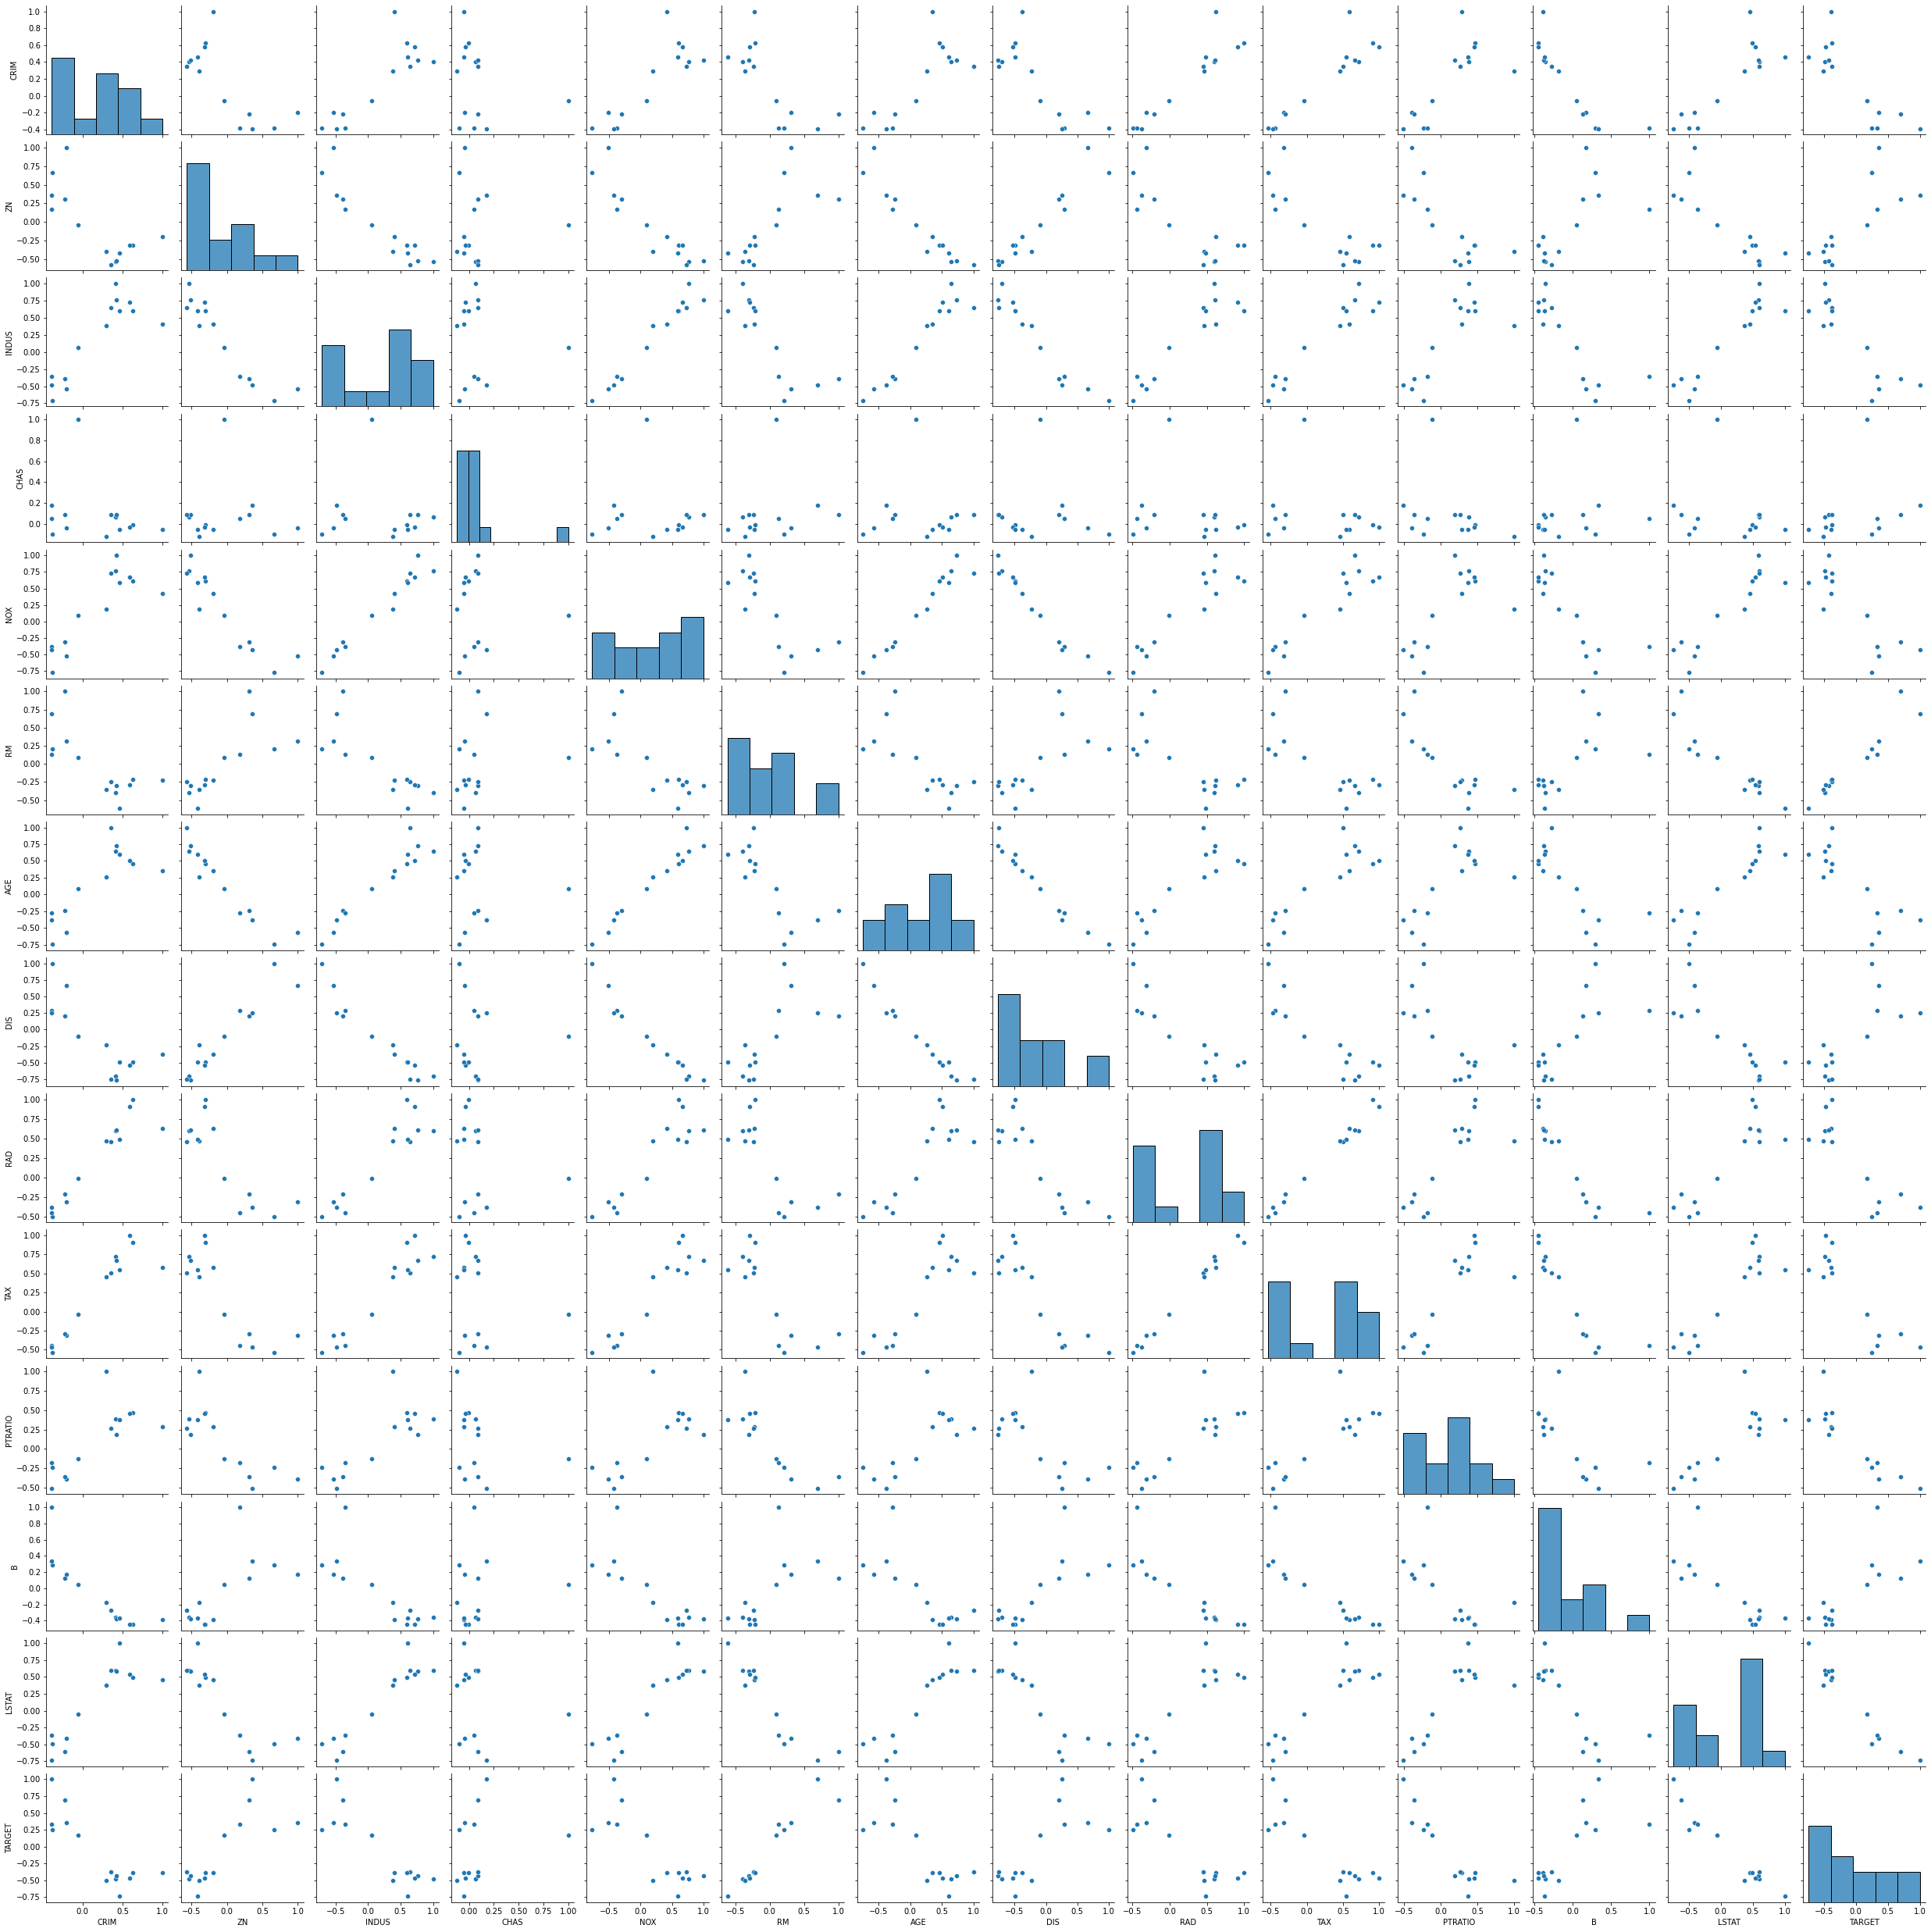

In [7]:
sns.pairplot(df.corr())

<AxesSubplot:>

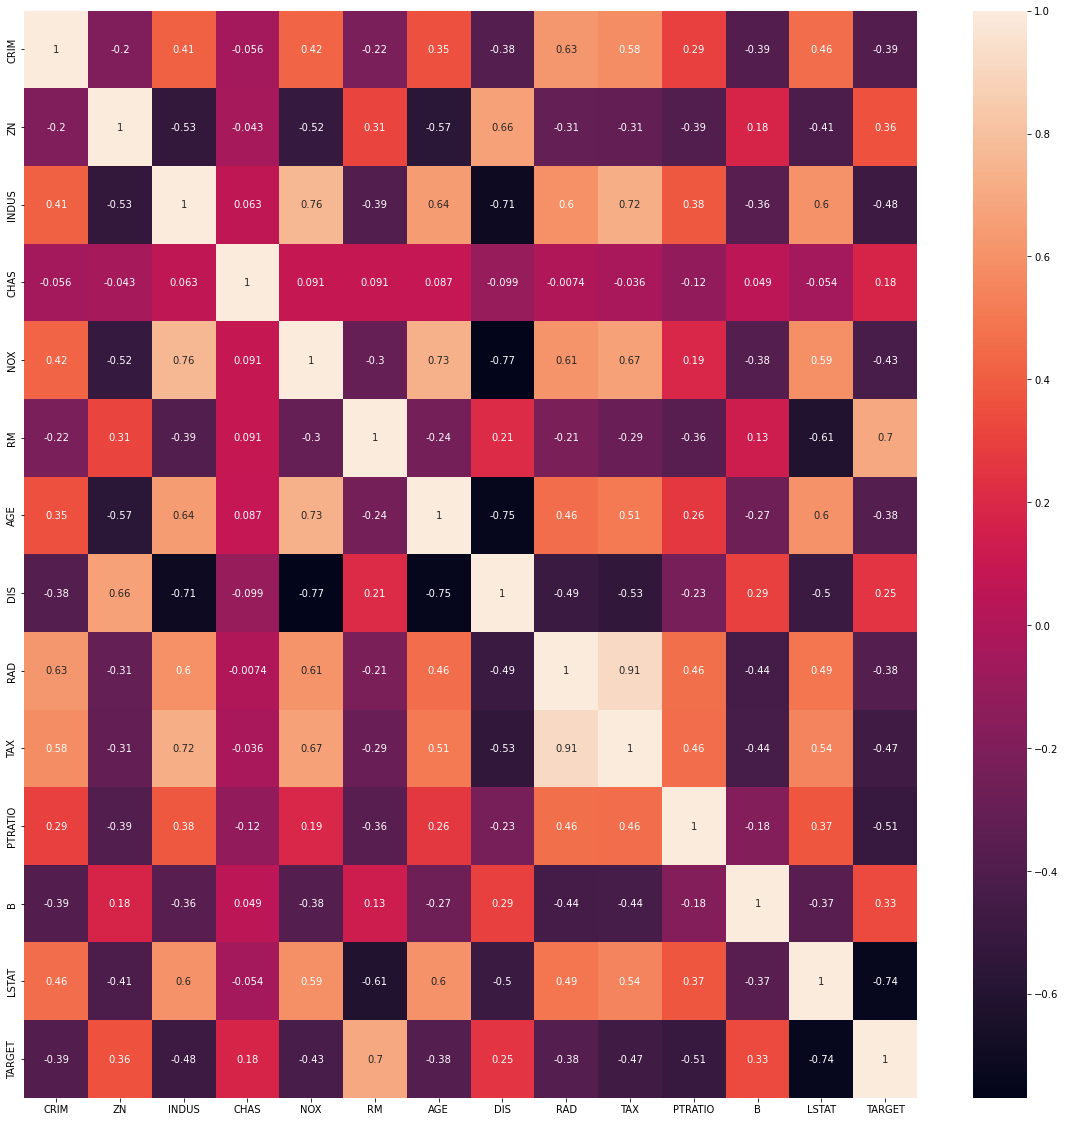

In [8]:
plt.figure(figsize=(20,20))
sns.heatmap(df.corr(),annot=True)

# Train Test Split

In [9]:
x = df.drop('TARGET',axis=1)
y = df['TARGET']

In [10]:
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.25,random_state=1)

## 1. Linear Model 

In [11]:
lr_model = LinearRegression()
lr_model.fit(x_train,y_train)

LinearRegression()

In [12]:
# Testing Data Evaluation

y_pred_test = lr_model.predict(x_test)

mse = mean_squared_error(y_test,y_pred_test)
print("MSE is",mse)

mae = mean_absolute_error(y_test,y_pred_test)
print("MAE is",mae)

rmse = np.sqrt(mse)
print("RMSE is",rmse)

r2_value = r2_score(y_test,y_pred_test)
print("R2 is ",r2_value)

adj_r2 = 1- ((1-r2_value)*(x_test.shape[0]-1))/(x_test.shape[0]-x_test.shape[1]-1)
print("Adjusted r2 score is",adj_r2)

MSE is 21.89776539604953
MAE is 3.574868126127553
RMSE is 4.679504823808768
R2 is  0.7789410172622855
Adjusted r2 score is 0.7535094528765307


In [13]:
# Training Data Evaluation

y_pred_train = lr_model.predict(x_train)

mse = mean_squared_error(y_train,y_pred_train)
print("MSE is",mse)

mae = mean_absolute_error(y_train,y_pred_train)
print("MAE is",mae)

rmse = np.sqrt(mse)
print("RMSE is",rmse)

r2_value = r2_score(y_train,y_pred_train)
print("R2 is ",r2_value)

adj_r2 = 1- ((1-r2_value)*(x_train.shape[0]-1))/(x_train.shape[0]-x_train.shape[1]-1)
print("Adjusted r2 score is",adj_r2)

MSE is 22.477983821877896
MAE is 3.2505130022869975
RMSE is 4.74109521333182
R2 is  0.7168057552393374
Adjusted r2 score is 0.7067193848779987


## 2. Decision Tree Model

In [14]:
from sklearn.tree import DecisionTreeRegressor

In [15]:
dt_model = DecisionTreeRegressor()
dt_model.fit(x_train,y_train)

DecisionTreeRegressor()

In [16]:
# Testing Data Evaluation

y_pred_test = dt_model.predict(x_test)

mse = mean_squared_error(y_test,y_pred_test)
print("MSE is",mse)

mae = mean_absolute_error(y_test,y_pred_test)
print("MAE is",mae)

rmse = np.sqrt(mse)
print("RMSE is",rmse)

r2_value = r2_score(y_test,y_pred_test)
print("R2 is ",r2_value)

# adj_r2 = 1- ((1-r2_value)*(x_test.shape[0]-1))/(x_test.shape[0]-x_test.shape[1]-1)
# print("Adjusted r2 score is",adj_r2)

MSE is 17.60346456692913
MAE is 3.040944881889764
RMSE is 4.195648289231252
R2 is  0.8222921882921083


In [17]:
# Training Data Evaluation

y_pred_train = dt_model.predict(x_train)

mse = mean_squared_error(y_train,y_pred_train)
print("MSE is",mse)

mae = mean_absolute_error(y_train,y_pred_train)
print("MAE is",mae)

rmse = np.sqrt(mse)
print("RMSE is",rmse)

r2_value = r2_score(y_train,y_pred_train)
print("R2 is ",r2_value)

# adj_r2 = 1- ((1-r2_value)*(x_train.shape[0]-1))/(x_train.shape[0]-x_train.shape[1]-1)
# print("Adjusted r2 score is",adj_r2)

MSE is 0.0
MAE is 0.0
RMSE is 0.0
R2 is  1.0


### Hyperparameter Tuning

In [18]:
dt_hyp_model = DecisionTreeRegressor()

hyperparameters = {'criterion':['mse','mae'],
    'max_depth': np.arange(2,14),
    'min_samples_split': np.arange(3,10),
    'min_samples_leaf' : np.arange(2,20)}

rscv_model = RandomizedSearchCV(dt_hyp_model,hyperparameters,cv=5)
rscv_model.fit(x_train,y_train)

RandomizedSearchCV(cv=5, estimator=DecisionTreeRegressor(),
                   param_distributions={'criterion': ['mse', 'mae'],
                                        'max_depth': array([ 2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13]),
                                        'min_samples_leaf': array([ 2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17, 18,
       19]),
                                        'min_samples_split': array([3, 4, 5, 6, 7, 8, 9])})

In [19]:
rscv_model.best_estimator_

DecisionTreeRegressor(max_depth=7, min_samples_leaf=4, min_samples_split=3)

In [20]:
dt_model = rscv_model.best_estimator_

In [21]:
# Testing Data Evaluation

y_pred_test = dt_model.predict(x_test)

mse = mean_squared_error(y_test,y_pred_test)
print("MSE is",mse)

mae = mean_absolute_error(y_test,y_pred_test)
print("MAE is",mae)

rmse = np.sqrt(mse)
print("RMSE is",rmse)

r2_value = r2_score(y_test,y_pred_test)
print("R2 is ",r2_value)

MSE is 12.833490669714562
MAE is 2.749932862494355
RMSE is 3.5823861698195745
R2 is  0.8704453015588132


In [22]:
# Training Data Evaluation

y_pred_train = dt_model.predict(x_train)

mse = mean_squared_error(y_train,y_pred_train)
print("MSE is",mse)

mae = mean_absolute_error(y_train,y_pred_train)
print("MAE is",mae)

rmse = np.sqrt(mse)
print("RMSE is",rmse)

r2_value = r2_score(y_train,y_pred_train)
print("R2 is ",r2_value)

MSE is 5.44745927120559
MAE is 1.6509165523358817
RMSE is 2.333979278229691
R2 is  0.9313688840423476


### Going ahead with Decision Tree Model after Hyperparameter Tuning as it has the best accuracy

In [24]:
df.columns

Index(['CRIM', 'ZN', 'INDUS', 'CHAS', 'NOX', 'RM', 'AGE', 'DIS', 'RAD', 'TAX',
       'PTRATIO', 'B', 'LSTAT', 'TARGET'],
      dtype='object')

In [25]:
json_data = {'columns' : list(x.columns)}

In [26]:
import pickle

with open ("Boston.pkl",'wb') as f:
    pickle.dump(dt_model,f)

In [27]:
import json

with open ("columns_data.json",'w') as f:
    json.dump(json_data,f)